# AI-Based Crop Recommendation System (TGPDS20)
A software application that suggests the best crops based on soil type, climate, and weather conditions, helping farmers maximize yield and efficiency.


# Data Preprocessing

In [2]:
# Preprocessing pipeline for crop yield dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/content/crop_yield_minimized.csv', low_memory=False)

# Handling mixed datatypes and missing values
df.dropna(inplace=True)

# Convert boolean columns to numeric
df['Fertilizer_Used'] = df['Fertilizer_Used'].astype(int)
df['Irrigation_Used'] = df['Irrigation_Used'].astype(int)

# Encoding categorical features using Label Encoding (or use OneHotEncoder if preferred)
categorical_features = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessing complete. Data ready for modeling!")


Preprocessing complete. Data ready for modeling!


# Training RandomForest Model

In [3]:
# Building a Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Mean Squared Error: 0.41
Root Mean Squared Error: 0.64
R-squared (R2) Score: 0.88


# Hyper Tuning

In [4]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter space
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search with Cross Validation
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", random_search.best_params_)

# Evaluate best model
best_rf = random_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Display tuned model performance
print(f'Tuned Mean Squared Error: {mse_tuned:.2f}')
print(f'Tuned Root Mean Squared Error: {rmse_tuned:.2f}')
print(f'Tuned R-squared (R2) Score: {r2_tuned:.2f}')

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Tuned Mean Squared Error: 0.52
Tuned Root Mean Squared Error: 0.72
Tuned R-squared (R2) Score: 0.85


Explore XgBoost

In [5]:
# XGBoost Regression Implementation
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display evaluation metrics
print(f'XGBoost Mean Squared Error: {mse_xgb:.2f}')
print(f'XGBoost Root Mean Squared Error: {rmse_xgb:.2f}')
print(f'XGBoost R-squared (R2) Score: {r2_xgb:.2f}')


XGBoost Mean Squared Error: 0.44
XGBoost Root Mean Squared Error: 0.67
XGBoost R-squared (R2) Score: 0.87


# Visualisation and Reports

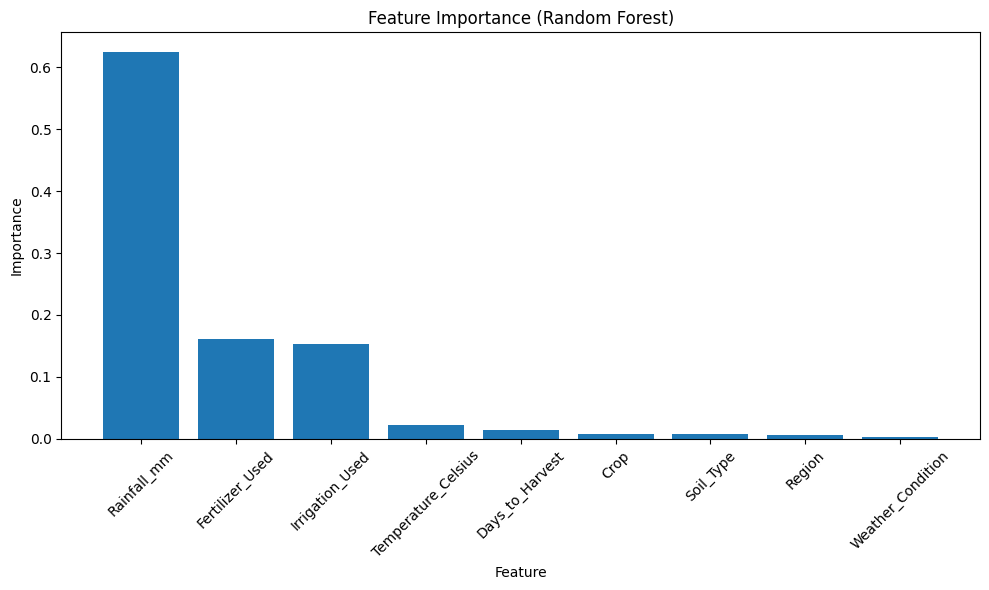

In [6]:
# Built-in feature importance using Random Forest
import matplotlib.pyplot as plt

# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

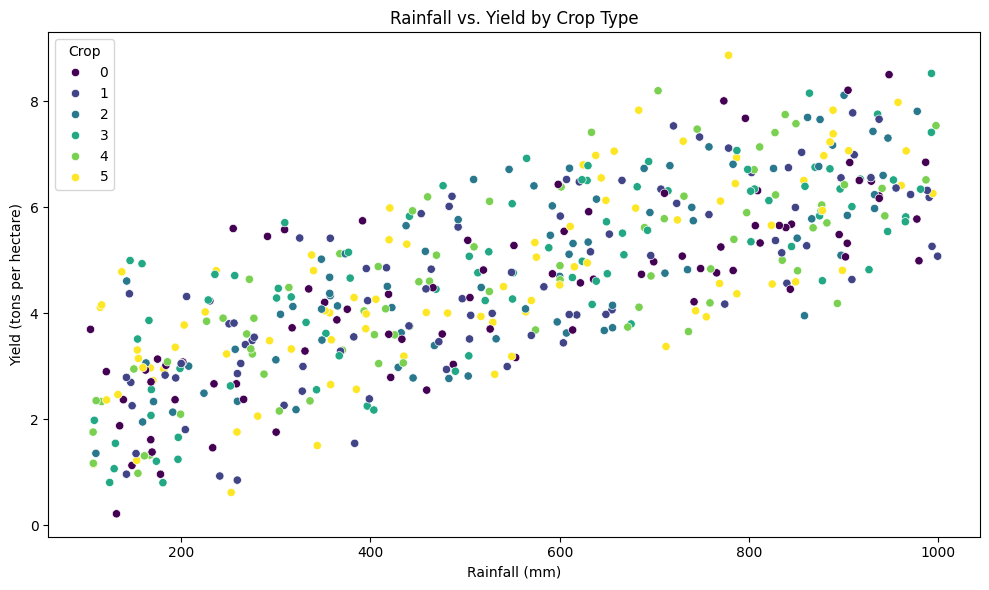

<ipython-input-8-c7148e435e75>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viz, x='Fertilizer_Used', y='Yield_tons_per_hectare', palette='Set2')


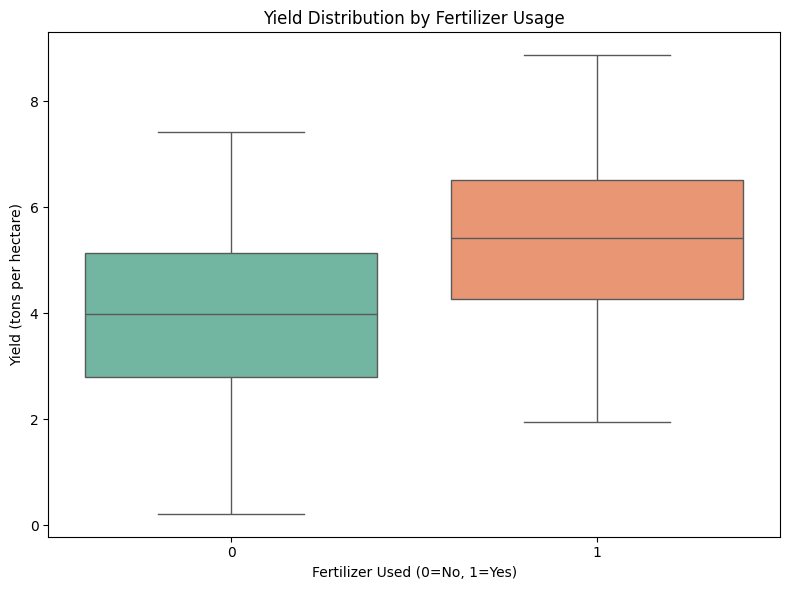

<ipython-input-8-c7148e435e75>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viz, x='Irrigation_Used', y='Yield_tons_per_hectare', palette='Set3')


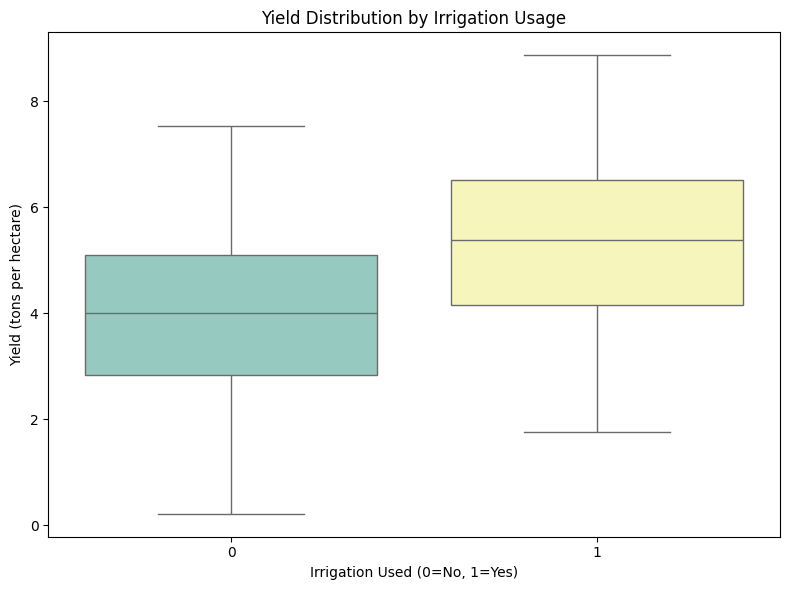

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load clean and preprocessed data again for accurate visualization
df_viz = df.dropna().copy()

# Convert boolean columns explicitly to integers for visualization
df_viz['Fertilizer_Used'] = df_viz['Fertilizer_Used'].astype(int)
df_viz['Irrigation_Used'] = df_viz['Irrigation_Used'].astype(int)

# Plot 1: Scatter Plot (Rainfall vs Yield)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_viz, x='Rainfall_mm', y='Yield_tons_per_hectare', hue='Crop', palette='viridis')
plt.title('Rainfall vs. Yield by Crop Type')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (tons per hectare)')
plt.legend(title='Crop')
plt.tight_layout()
plt.show()

# Plot 2: Box Plot (Fertilizer Usage vs Yield)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_viz, x='Fertilizer_Used', y='Yield_tons_per_hectare', palette='Set2')
plt.title('Yield Distribution by Fertilizer Usage')
plt.xlabel('Fertilizer Used (0=No, 1=Yes)')
plt.ylabel('Yield (tons per hectare)')
plt.tight_layout()
plt.show()

# Plot 3: Box Plot (Irrigation Usage vs Yield)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_viz, x='Irrigation_Used', y='Yield_tons_per_hectare', palette='Set3')
plt.title('Yield Distribution by Irrigation Usage')
plt.xlabel('Irrigation Used (0=No, 1=Yes)')
plt.ylabel('Yield (tons per hectare)')
plt.tight_layout()
plt.show()